In [98]:
import json
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [16]:
teams_to_systems = json.load(open('team-to-submissions.json'))
datasets = {
    'pan24-generative-authorship-test-20240502-test': 'A (test main)',
    'pan24-generative-authorship-test-b-20240506-test': 'B (cross-domain)',
    'pan24-generative-authorship-news-test-c-20240506-test': 'C (Unicode full)',
    'pan24-generative-authorship-news-test-d-20240506-test': 'D (Unicode half)',
    'pan24-generative-authorship-news-test-e-20240506-test': 'E (German)',
    'pan24-generative-authorship-news-test-f-20240514-test': 'F (paraphrase)',
    'pan24-generative-authorship-news-test-g-20240516-test': 'G (Contrastive)',
    'pan24-generative-authorship-news-test-h-20240521-test': 'H (Short length)',
    'pan24-generative-authorship-eloquent-20240523-test': 'Eloquent'
}

df = []
evaluation_scores = json.load(open('evaluation-scores.json', 'r'))
for team, systems in teams_to_systems.items():
    for s in systems:
        row_base = {'team': team, 'system': s}
        for d, dn in datasets.items():
            df.extend(
                {
                    **row_base,
                    'dataset': dn,
                    'source': src,
                    **evaluation_scores[team][s][d]['_sources'][src]
                } for src in evaluation_scores[team].get(s, {}).get(d, {}).get('_sources', [])
            )

df = pd.DataFrame(df)
df.set_index(['dataset', 'team', 'system', 'source'], inplace=True)
df

roc-auc  \
dataset       team         system          source                                 
A (test main) cnlp-nits-pp direct-velocity alpaca-7b                      0.996   
                                           bigscience-bloomz-7b1          0.988   
                                           gemini-pro                     0.998   
                                           gemini-pro-high-temperature    0.999   
                                           gpt-3.5-turbo-0125             0.999   
...                                                                         ...   
Eloquent      baseline     logistic-fsu    chatgpt35                      0.993   
                                           gptsw3                         0.879   
                                           reindeer-mistral               1.000   
                                           reindeer-poro                  1.000   
                                           verbanex-ai                    1.000   

                                                                        brier  \
dataset       team         system          source                               
A (test main) cnlp-nits-pp direct-velocity alpaca-7b                    0.866   
                                           bigscience-bloomz-7b1        0.865   
                                           gemini-pro                   0.881   
                                           gemini-pro-high-temperature  0.883   
                                           gpt-3.5-turbo-0125           0.878   
...                                                                       ...   
Eloquent      baseline     logistic-fsu    chatgpt35                    0.885   
                                           gptsw3                       0.821   
                                           reindeer-mistral             0.862   
                                           reindeer-poro                0.881   
                                           verbanex-ai                  0.879   

                                                                          c@1  \
dataset       team         system          source                               
A (test main) cnlp-nits-pp direct-velocity alpaca-7b                    0.986   
                                           bigscience-bloomz-7b1        0.980   
                                           gemini-pro                   0.996   
                                           gemini-pro-high-temperature  0.997   
                                           gpt-3.5-turbo-0125           0.997   
...                                                                       ...   
Eloquent      baseline     logistic-fsu    chatgpt35                    0.958   
                                           gptsw3                       0.875   
                                           reindeer-mistral             0.958   
                                           reindeer-poro                1.000   
                                           verbanex-ai                  1.000   

                                                                           f1  \
dataset       team         system          source                               
A (test main) cnlp-nits-pp direct-velocity alpaca-7b                    0.954   
                                           bigscience-bloomz-7b1        0.934   
                                           gemini-pro                   0.963   
                                           gemini-pro-high-temperature  0.976   
                                           gpt-3.5-turbo-0125           0.969   
...                                                                       ...   
Eloquent      baseline     logistic-fsu    chatgpt35                    0.952   
                                           gptsw3                       0.889   
                                           reindeer-mistral             0.

In [10]:
df_mean = df.groupby(['team', 'system']).mean().sort_values('mean', ascending=False)
df_mean

roc-auc  \
team                           system                                                       
you-shun-you-de                plain-fortress                                    0.960528   
                               charitable-mole_v3                                0.960528   
marsan                         staff-trunk                                       0.980035   
iimasnlp                       final-run7-gnnllm_llmft_stylofeat-fullpartitionA  0.945321   
                               final-run8-gnnllm_stylofeat-fullpartitionB        0.940925   
...                                                                                   ...   
turtlewu                       cnn_fanle                                         0.342500   
foshan-university-of-guangdong pizzicato-radian                                  0.480778   
turtlewu                       transform_fanle                                   0.278778   
lam                            several-fleet                                     0.493434   
foshan-university-of-guangdong independent-net                                   0.502722   

                                                                                    brier  \
team                           system                                                       
you-shun-you-de                plain-fortress                                    0.956264   
                               charitable-mole_v3                                0.956264   
marsan                         staff-trunk                                       0.949281   
iimasnlp                       final-run7-gnnllm_llmft_stylofeat-fullpartitionA  0.941226   
                               final-run8-gnnllm_stylofeat-fullpartitionB        0.940302   
...                                                                                   ...   
turtlewu                       cnn_fanle                                         0.571750   
foshan-university-of-guangdong pizzicato-radian                                  0.723319   
turtlewu                       transform_fanle                                   0.380556   
lam                            several-fleet                                     0.734151   
foshan-university-of-guangdong independent-net                                   0.750361   

                                                                                      c@1  \
team                           system                                                       
you-shun-you-de                plain-fortress                                    0.958403   
                               charitable-mole_v3                                0.958403   
marsan                         staff-trunk                                       0.944316   
iimasnlp                       final-run7-gnnllm_llmft_stylofeat-fullpartitionA  0.941679   
                               final-run8-gnnllm_stylofeat-fullpartitionB        0.941962   
...                                                                                   ...   
turtlewu                       cnn_fanle                                         0.365153   
foshan-university-of-guangdong pizzicato-radian                                  0.223208   
turtlewu                       transform_fanle                                   0.360792   
lam                            several-fleet                                     0.036755   
foshan-university-of-guangdong independent-net                                   0.006319   

                                                                                       f1  \
team                           system                                                       
you-shun-you-de                plain-fortress                                    0.943681   
                               charitable-mole_v3                                0.943681   
marsan                         staff-trunk                                      

In [11]:
df_mean_by_ds = df.groupby(['dataset', 'team', 'system']).mean().sort_values(['dataset', 'mean'], ascending=[True, False])
df_mean_by_ds.corr(method='spearman')

,roc-auc,brier,c@1,f1,f05u,mean
roc-auc,1.000000,0.931172,0.960240,0.933902,0.947873,0.965490
brier,0.931172,1.000000,0.939520,0.926728,0.934127,0.956174
c@1,0.960240,0.939520,1.000000,0.977625,0.986999,0.992093
f1,0.933902,0.926728,0.977625,1.000000,0.986132,0.987562
f05u,0.947873,0.934127,0.986999,0.986132,1.000000,0.993241
mean,0.965490,0.956174,0.992093,0.987562,0.993241,1.000000


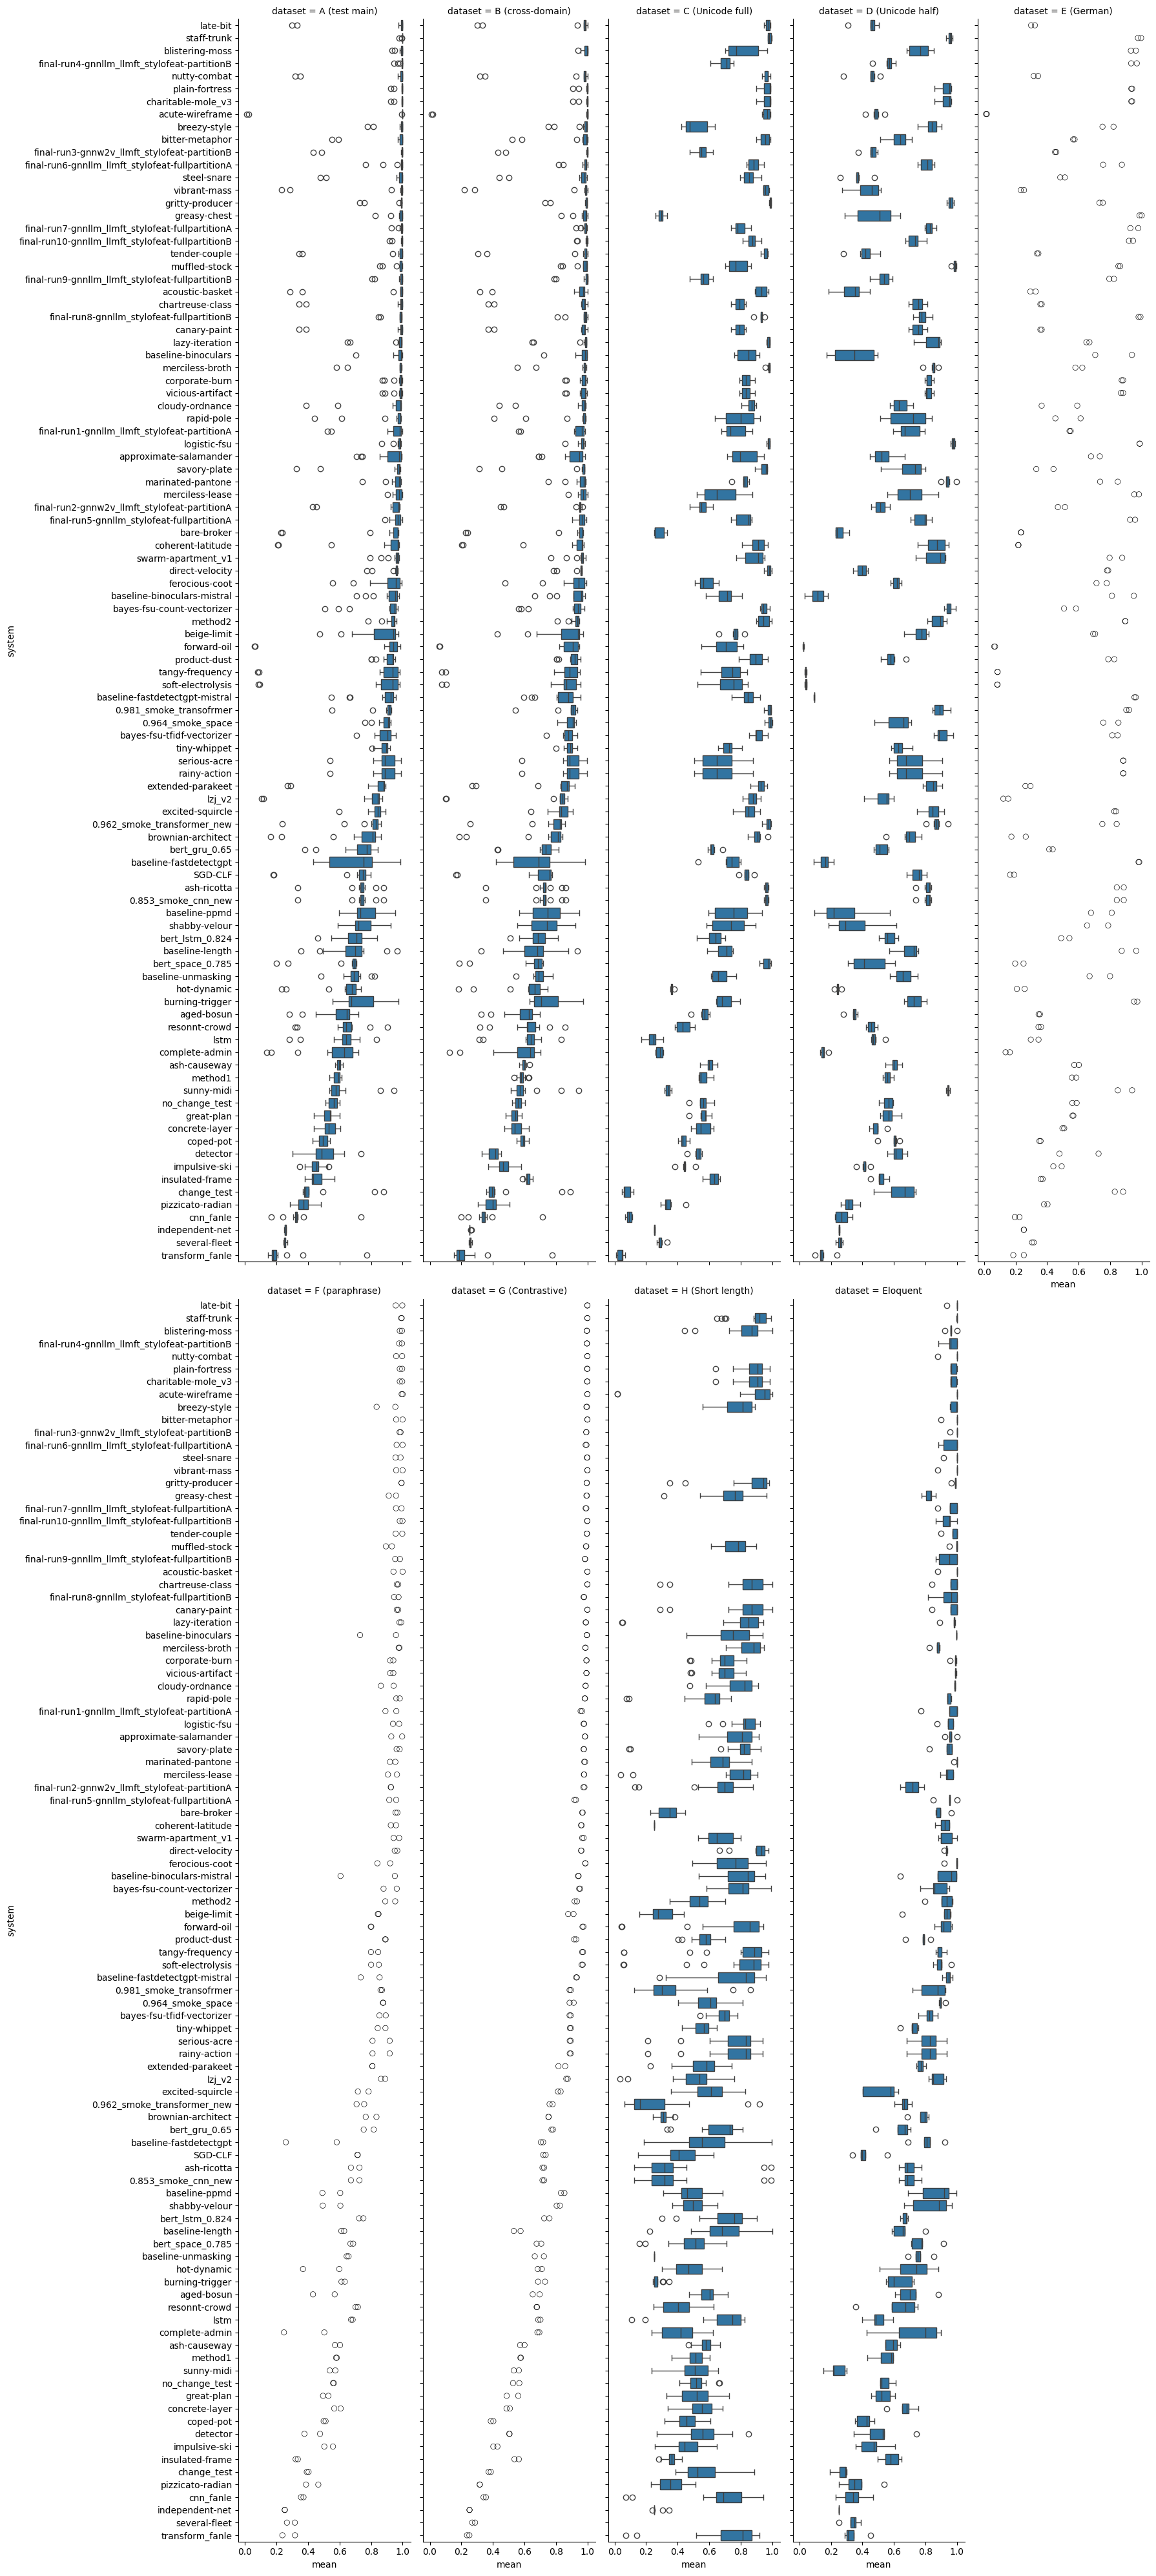

In [116]:
group = 'system'
sort_order = df.loc['A (test main)'].groupby(group).median('mean').sort_values('mean', ascending=False).index
# sort_order = df.groupby(group).median('mean').sort_values('mean', ascending=False).index
g = sns.FacetGrid(df.reset_index(), col='dataset', col_wrap=5, height=20, aspect=0.18)
# for d in df.index.unique(0).values:
    # plt.figure(figsize=(5, 7))
# g.map_dataframe(sns.barplot, x='mean', y='system', errorbar=('ci', 95), order=sort_order)

def _map_fn(data, **kwargs):
    if data['source'].nunique() < 5:
        return sns.scatterplot(data=data, fc='none', ec='k', **kwargs)
    return sns.boxplot(data=data, order=sort_order, **kwargs)

g.map_dataframe(_map_fn, x='mean', y=group)
    # plt.title(d)
plt.tight_layout()
plt.show()

In [105]:
# from tira.rest_api_client import Client
# tira = Client()
# from tqdm import tqdm
# 
# def load_evaluation(team, dataset, software):
#     ret = tira.download_evaluation('generative-ai-authorship-verification-panclef-2024', dataset, software, team)
#     return json.load(open(f'{ret}/evaluation.json'))

In [106]:
# ret = {}
# 
# for dataset in datasets:
#     for team, systems in tqdm(teams_to_systems.items(), 'Process ' + dataset):
#         for s in systems:
#             if team not in ret:
#                 ret[team] = {}
#             if s not in ret[team]:
#                 ret[team][s] = {}
# 
#             try:
#                 ret[team][s][dataset] = load_evaluation(team, dataset, s)
#             except:
#                 pass
# 
# json.dump(ret, open('evaluation-scores.json', 'w'))